# Model Output Notebook
<img style="float:right;" src="https://id.dewberry.com/clients/Templates/DewberryLogo_RGB.png" width=150px>

### ADCIRC-SWAN Ouput
#### - Steps to follow:
  1. Import Libraries & Assign Paths
  2. Assign Tasks
  3. Save Report

### Description
Read data from ADCIRC output files and plot

---

#### - Requirements
  1. Dewberry ADCIRC Python Library (Python 3.6)
  2. ADCIRC Output Files
  
#### - Usage:
  1. Import Libraries & Assign Paths
  2. Read in data from files:
  3. Add comments/Request feedback
  4. Save Report
  
 ---

#### 1. Import Libraries and paths

In [1]:
import numpy as np
import netCDF4 as nc4
import os
from adcirc import adcirc
from IPython.display import HTML

In [2]:
root_dir = r'C:\Users\tmiesse\Work\output2'
f63 = os.path.join(root_dir,'fort.63.nc')
f64 = os.path.join(root_dir,'fort.64.nc')
f73 = os.path.join(root_dir,'fort.73.nc')
f74 = os.path.join(root_dir,'fort.74.nc')

## Plot Attributed nodes for all parameters 
*Customize Bounding boxes for each parameter as needed*

#### Water surface elevation and velocity within the study area

KeyboardInterrupt: 

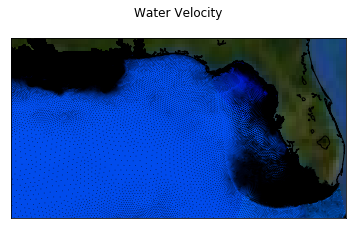

In [5]:
title = 'Water Velocity'
lat1,lat2 = 24, 31
lon1,lon2 = -93, -80
file1 = nc4.Dataset(f63)
file2 = nc4.Dataset(f64)
hours = 161
levels = np.arange(-1.5, 1.5, 0.1)
adcirc.water_velocity(root_dir,file1,file2,title,hours,levels,lon1,lon2,lat1,lat2)
HTML('<img width="800" height="600" src="WaterVelocity.gif" frameborder="0" allowfullscreen></img>')

---
##### <font color='blue'>QC Comments: (date if applicable)</font> 
---

##### <font color='blue'>QC Response</font>
---

#### Water surface elevation within the study area

In [ ]:
title = 'Water Level'
lat1,lat2 = 23, 31
lon1,lon2 = -93, -80
file1 = nc4.Dataset(f63)
hours = 161
levels = np.arange(-1.5, 1.5, 0.1)
start = '2005082318'
adcirc.global_water(root_dir,file1,title,hours,levels,lon1,lon2,lat1,lat2,start)
HTML('<img width="1000" height="700" src="WaterLevel.gif" frameborder="0" allowfullscreen></img>')

In [4]:
HTML('<img width="1000" height="700" src="WaterLevel.gif" frameborder="0" allowfullscreen></img>')

---
##### <font color='blue'>QC Comments: (date if applicable)</font> 
---

##### <font color='blue'>QC Response</font>
---

#### Depth-averaged Velocities within the study area

In [ ]:
title = 'Global Velocity'
lat1,lat2 = 23, 31
lon1,lon2 = -93, -80
file2 = nc4.Dataset(f64)
hours = 161
start = '2005082318'
levels = np.arange(-1, 1, 0.1)
adcirc.global_velocity(root_dir,file2,title,hours,levels,lon1,lon2,lat1,lat2,start)
HTML('<img width="800" height="600" src="GlobalVelocity.gif" frameborder="0" allowfullscreen></img>')

KeyboardInterrupt: 

---
##### <font color='blue'>QC Comments: (date if applicable)</font> 
---

##### <font color='blue'>QC Response</font>
---

#### Atmospheric Pressure within the study area

In [3]:
title = 'Atmospheric Pressure'
lat1,lat2 = 23, 31
lon1,lon2 = -93, -80
file3 = nc4.Dataset(f73)
hours = 161
start = '2005082318'
levels = np.arange(9.1,10.3, 0.1)
adcirc.global_pressure(root_dir,file3,title,hours,levels,lon1,lon2,lat1,lat2,start)
HTML('<img width="1000" height="700" src="AtmosphericPressure.gif" frameborder="0" allowfullscreen></img>')

---
##### <font color='blue'>QC Comments: (date if applicable)</font> 
---

##### <font color='blue'>QC Response</font>
---

#### Wind Stress or Velocity within the study area

In [4]:
title = 'Wind Stress'
lat1,lat2 = 34.05, 35.15
lon1,lon2 = -78, -76
file4 = nc4.Dataset(f74)
hours,g_type = 96
levels = np.arange(9.9,10.9, 0.1)
adcirc.global_wind(root_dir,file4,title,hours,levels,lon1,lon2,lat1,lat2)

---
##### <font color='blue'>QC Comments: (date if applicable)</font> 
---

##### <font color='blue'>QC Response</font>
---